<img align="center" src="https://iili.io/3wI8gI.png" style="height:90px" style="width:30px"/>

<h1><center>Canceled bookings at a hotel</center></h1>

<hr style="border:3px solid pink"> </hr>



You have been assigned the task of building a model that will predict whether or not a customer of a hotel will cancel their booking. The data for this assingment is found in the csv file `hotel_clf`

<br> 
<div>
<img src="https://5.imimg.com/data5/PC/BL/MY-33192851/hotel-reservation-services-500x500.jpg" width="400"/>
</div>
<br> 
If the model predicts that a customer will cancel their booking, that customer will be sent a special deal to try to keep the customer from cancel the booking. If the prediction is correct (a True Positive), the expected gain is 1000 SEK. However, if the prediction is wrong (a False Positive), the expected loss is 500 SEK. 

Your goal is to build the most profitable model possible.


<hr style="border:3px solid pink"> </hr>

Instructions for train test split:

- Test size = 0.2
- Random state = 42

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc

In [35]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

df = pd.read_csv('hotel_bookings.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [98]:
# Class Balance
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.725164
1    0.274836
Name: proportion, dtype: float64

## Data Cleaning

### Missing Data

In [36]:
# Step 1: Dropping the 'company' column
df = df.drop(columns=['company'])

# Step 2: Imputing missing values in the 'agent' column with 0
df['agent'] = df['agent'].fillna(0)

# Step 3: Imputing missing values in the 'country' column with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Step 4: Dropping rows with missing values in other features
rows_before_drop = len(df)
df = df.dropna()
rows_after_drop = len(df)

# Calculating the number of rows dropped and the percentage of data dropped
rows_dropped = rows_before_drop - rows_after_drop
percentage_dropped = (rows_dropped / rows_before_drop) * 100

# Summary of rows dropped due to missing values
print(f"Summary of Rows Dropped:")
print(f"------------------------")
print(f"Number of rows dropped: {rows_dropped}")
print(f"Percentage of entire dataset dropped: {percentage_dropped:.3f}%")

Summary of Rows Dropped:
------------------------
Number of rows dropped: 4
Percentage of entire dataset dropped: 0.003%


In [37]:
# Identifying duplicated rows and sorting them to have identical ones next to each other
duplicated_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))  # keep=False

print("Total Duplicated Rows: ", df.duplicated().sum())

# Displaying the duplicated rows
print("\nExample of Duplicated Rows with Identical Ones Next to Each Other:")
duplicated_rows[:2]


Total Duplicated Rows:  32001

Example of Duplicated Rows with Identical Ones Next to Each Other:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40772,City Hotel,0,0,2015,August,32,7,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient,75.0,0,1,Check-Out,2015-08-09
40802,City Hotel,0,0,2015,August,32,7,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient,75.0,0,1,Check-Out,2015-08-09


In [38]:
# Drop duplicate rows and calculate remaining rows
rows_dropped = df.duplicated().sum()
original_rows = len(df)
df.drop_duplicates(inplace=True)
remaining_rows = len(df)

# Print dropped and remaining rows
print(f"Dropped {rows_dropped} duplicates.")
print(f"Remaining: {remaining_rows}/{original_rows}")

Dropped 32001 duplicates.
Remaining: 87385/119386


### EDA

In [39]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(
#     df=df,
#     title='Profiling Report',
#     html={"style": {"full_width": True}},
#     minimal=False,
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": True},
#         "kendall": {"calculate": True},
#         "phi_k": {"calculate": True},
#         "cramers": {"calculate": True},
#     },
# )

# #profile.to_widgets()
# #profile.to_file("profiling_report.html")
# profile.to_notebook_iframe()

# # %matplotlib inline  # reset to interactive backend

### Sparse Categories

In [40]:
# "L" and "P" are sparse
df['reserved_room_type'].value_counts()

reserved_room_type
A    56546
D    17398
E     6048
F     2823
G     2052
B      995
C      915
H      596
L        6
P        6
Name: count, dtype: int64

In [41]:
# "Undefined" is sparse
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        69138
Direct       12988
Corporate     5077
GDS            181
Undefined        1
Name: count, dtype: int64

In [42]:
# Drop rows with too low cardinality for logistic regression
# Remove rows with 'P' in 'reserved_room_type' due to sparsity (6)
df = df[df['reserved_room_type'] != 'P']

# Remove rows with 'L' in 'reserved_room_type' due to sparsity (6)
df = df[df['reserved_room_type'] != 'L']

# Remove rows with 'Undefined' in 'distribution_channel' due to sparsity (5)
df = df[df['distribution_channel'] != 'Undefined']

In [43]:
# Multiple countries are sparse
df['country'].value_counts()

country
PRT    27437
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 178, dtype: int64

In [44]:
#%matplotlib inline
# Identify countries with less than 10 occurrences
less_than_10 = df['country'].value_counts()[df['country'].value_counts() < 10].index

# Replace values with "Other"
df.loc[df['country'].isin(less_than_10), 'country'] = 'Other'

# Print the number of countries put into the "Other" category
print(f"{len(less_than_10)} countries were categorized as 'Other'.\n")

# Print updated value counts
print(df['country'].value_counts())


83 countries were categorized as 'Other'.

country
PRT    27437
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
SEN       11
PRI       11
MAC       10
CMR       10
BGD       10
Name: count, Length: 96, dtype: int64


### Correlating Features

In [45]:
df['market_segment'].value_counts()

market_segment
Online TA        51613
Offline TA/TO    13887
Direct           11796
Groups            4942
Corporate         4207
Complementary      700
Aviation           227
Name: count, dtype: int64

In [46]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        69135
Direct       12981
Corporate     5075
GDS            181
Name: count, dtype: int64

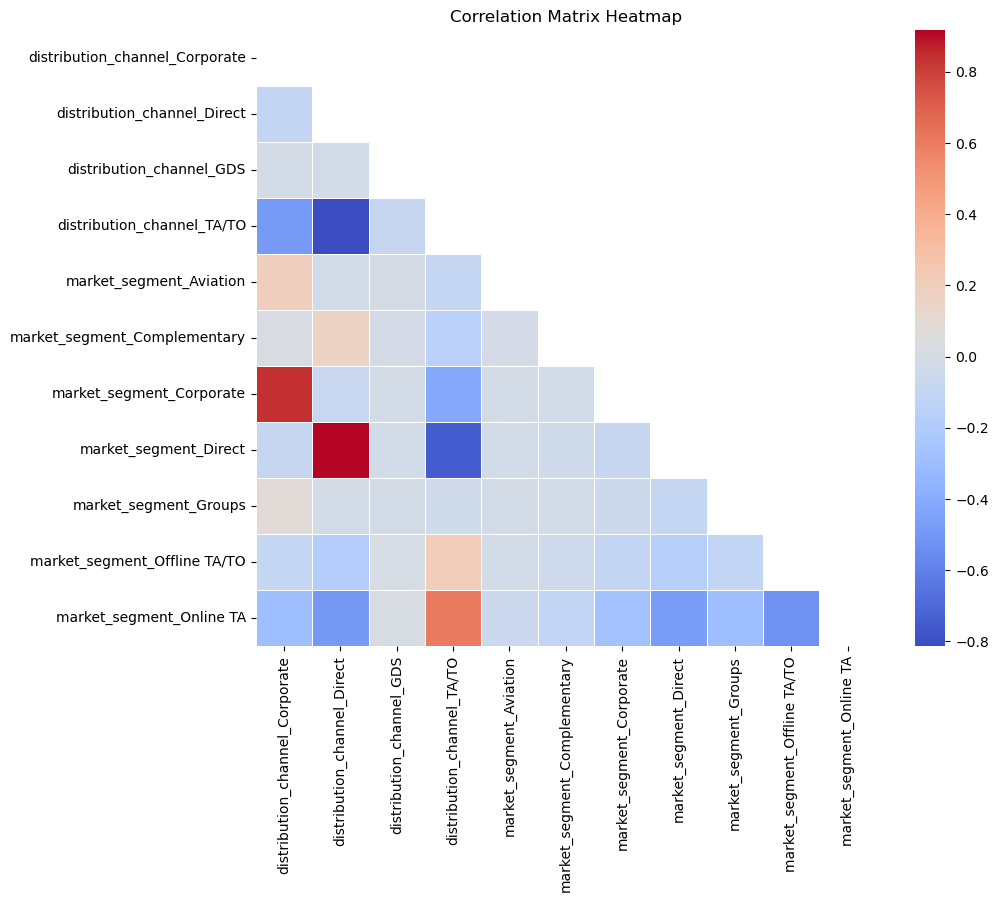

In [47]:
#%matplotlib inline

import warnings
warnings.filterwarnings(category=FutureWarning, action='ignore')

# Encode categorical variables
encoded_df = pd.get_dummies(df[['distribution_channel', 'market_segment']])

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


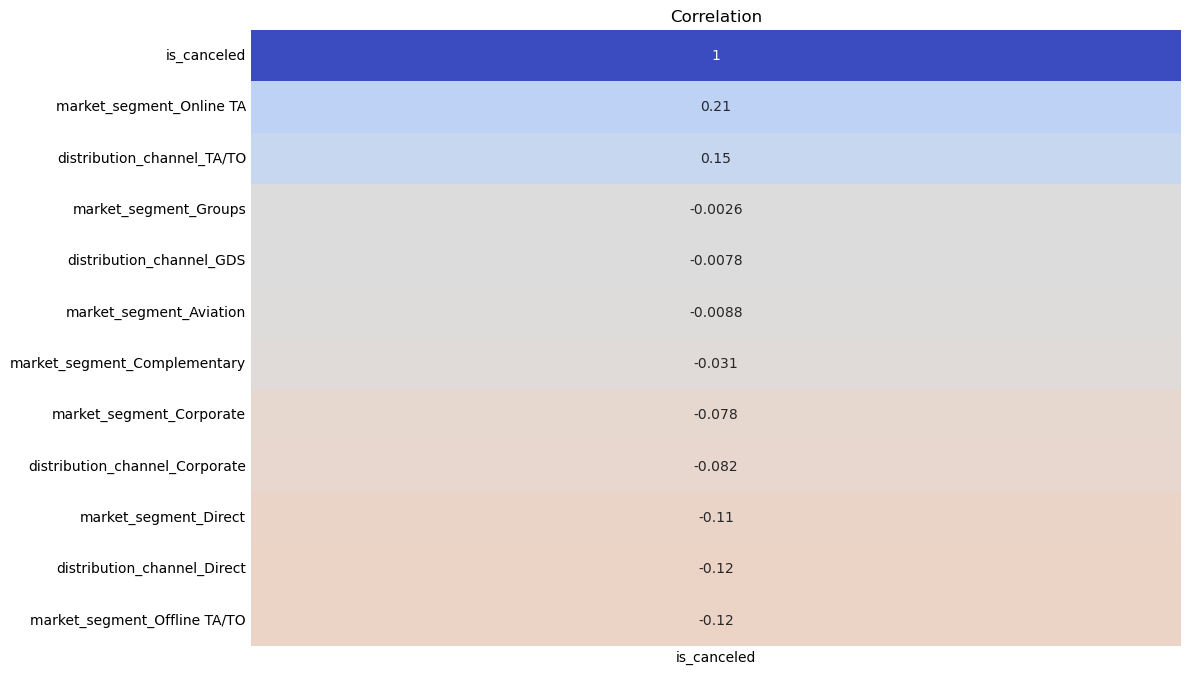

In [48]:
# Encode categorical variables
encoded_df = pd.get_dummies(df[['distribution_channel', 'market_segment']])

# Concatenate encoded_df with the 'is_canceled' column from df
encoded_df['is_canceled'] = df['is_canceled']

# Correlation Heatmap with target
corr = encoded_df.corr(numeric_only=True)["is_canceled"].sort_values(ascending=False).to_frame()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm_r", cbar=None, vmin=-1, vmax=+1, center=0)
plt.title("Correlation")
# Remove ticks from both x and y axes
plt.tick_params(axis='both', length=0)
plt.show()

### Strategic Feature Reduction for Predictive Accuracy

During the data analysis, we have decided to drop the following columns for the reasons specified:

- `reservation_status`: This column can cause data leakage for our target variable `is_canceled`. The status `Check-Out` implies that the customer did not cancel, which directly reveals the target.

- `reservation_status_date`: Similarly to `reservation_status`, this column could cause data leakage since the date of status might imply cancellation or not.

- `arrival_date_year`: The year of arrival would indicate that the booking was not canceled if they have arrived, leading to potential data leakage.

- `arrival_date_week_number`: This is being dropped for the same reason as `arrival_date_year`; its presence might reveal whether a booking was canceled.

- `assigned_room_type`: The type of room assigned can hint at whether the customer arrived; thus, it may not be canceled. Since `reserved_room_type` is retained, it captures the necessary room type information without potential data leakage.

- `distribution_channel`: This feature is highly correlated with `market_segment`. To reduce multicollinearity and to keep the dataset more concise, we are retaining the feature that has more distinctive categories and a higher correlation with the target variable.

- `arrival_date_day_of_month`: The day of the month is less informative compared to the week number for patterns such as holidays, which may have a more pronounced effect and do not typically span over a month. Since the `arrival_date_week_number` is more granular and informative for such patterns, we retain it and drop the day of the month.

These decisions are aimed at creating a more robust dataset for predictive modeling, ensuring that our features are informative without causing data leakage and reducing multicollinearity where possible.


In [49]:
# Drop specified columns
df = df.drop([
              'reservation_status',        # Would cause data leakage for our target variable 'is_canceled', if they did "Check-Out", they didn't cancel
              'reservation_status_date',   # Dito
              'arrival_date_year',         # Dito, if they arrived; they didn't cancel 
              'arrival_date_week_number',  # Dito, if they arrived; they didn't cancel 
              'assigned_room_type',        # Dito, if they were assigned a room, they may have arrived and hence not canceled ('reserved_room_type' is kept)
              'distribution_channel',      # Highly correlated with 'market_segment', we keep the one with more interesting categories and higher corr with target
              'arrival_date_day_of_month', # Already captured in 'arrival_date_week_number' which is more interesting given its higher granualirty for things like holidays, which doesn't span over months
], axis=1)

## Predictive Modelling: Logistic Regression

In [54]:
import pandas as pd
import warnings
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer

# Suppress warnings about unknown categories
#warnings.filterwarnings(action='ignore', message='Found unknown categories')

# Define features and target variable
X = df.drop(columns=['is_canceled'])  # Exclude target variable
y = df['is_canceled']

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)

# Initialize and fit the TargetEncoder on training data
target_encoder = TargetEncoder()
X_train['country'] = target_encoder.fit_transform(X_train['country'], y_train)
X_val['country'] = target_encoder.transform(X_val['country'])
X_test['country'] = target_encoder.transform(X_test['country'])

# Define transformers for numerical, 'agent', and categorical features
num_transformer = make_pipeline(StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='error', drop='first'))

# Define column selectors for numerical and categorical features
num_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include=object)

# Make the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    verbose_feature_names_out=False  # This ensures the original feature names are maintained
)

# Instantiate the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Create the pipeline
pipe = make_pipeline(preprocessor, log_reg_model)

# Define hyperparameter grid
param_grid = {
    'logisticregression__C': [1, 2, 3],  # Updated range for regularization strength
    'logisticregression__penalty': ['l2'],  # 'lbfgs' supports only 'l2', 'saga' supports both 'l1' and 'l2'
    'logisticregression__solver': ['lbfgs'],  # Focusing on 'lbfgs' and 'saga' solvers
    'logisticregression__tol': [0.0001],  # Including an additional tolerance level for experimentation
}

# Perform CV hyperparameter search
grid_logreg = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit best estimator on training data
grid_logreg.fit(X_train, y_train)

# Print best accuracy score and corresponding parameters
print(f"Best score (Accuracy): {grid_logreg.best_score_}\n")
print("Best params:")
for key, value in grid_logreg.best_params_.items():
    print(f"{key}: {value}")

# Evaluate the model on train and validation data
y_pred = grid_logreg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"\nAccuracy on train data: {grid_logreg.score(X_train, y_train)}")
print(f"Accuracy on test data: {accuracy}")
print(f"\nClassification Report on validation data: \n{class_report}")

Best score (Accuracy): 0.7923969914977109

Best params:
logisticregression__C: 3
logisticregression__penalty: l2
logisticregression__solver: lbfgs
logisticregression__tol: 0.0001

Accuracy on train data: 0.7925768476128189
Accuracy on test data: 0.7856706851823593

Classification Report on validation data: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9504
           1       0.67      0.44      0.53      3602

    accuracy                           0.79     13106
   macro avg       0.74      0.68      0.69     13106
weighted avg       0.77      0.79      0.77     13106



In [ ]:
corporate_themes = [
    'Greys',
    'Blues',
    'PuBu',
    'PuBuGn',
    'BuGn',
    'GnBu',
    'YlGnBu',
    'RdGy',
    'RdBu',
    'RdYlBu',
    'Paired',
    'Dark2',
    'Set1',
    'Set2',
    'Set3',
    'Pastel1',
    'Pastel2',
    'Accent'
]

In [ ]:
color_themes = [
    'Blues',
    'Greys',
    'Greens',
    'Oranges',
    'Purples',
    'inferno',
    'plasma',
    'magma',
    'viridis',
    'cividis',
    'rocket',
    'mako'
]

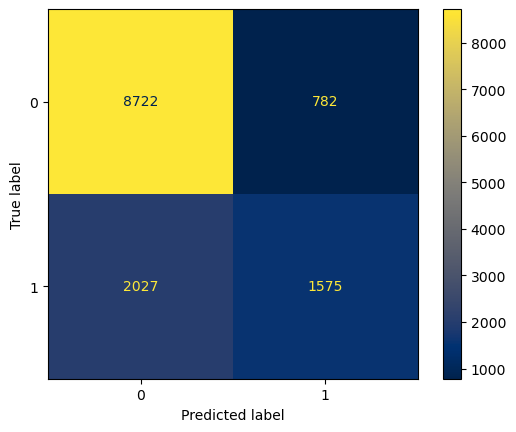

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

# CM for Validation Data
ConfusionMatrixDisplay.from_estimator(grid_logreg, X_val, y_val, cmap='cividis')
plt.show()

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Convert transformed features into DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())  # .toarray()

# Sample a fraction of the data, e.g., 10%
sample_fraction = 0.1
X_train_transformed_df_sample = X_train_transformed_df.sample(frac=sample_fraction, random_state=42)

def calculate_vif(X):
    # Calculate VIF for each feature in a DataFrame
    return pd.DataFrame(
        {'feature': X.columns,
         'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        })

# Call the function and sort the results
vif_data = calculate_vif(X_train_transformed_df_sample)  # X_train.drop(columns=['const']
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data[:5]

,feature,VIF
37,market_segment_Online TA,24.186627
48,customer_type_Transient,23.191854
36,market_segment_Offline TA/TO,7.333084
34,market_segment_Direct,6.691198
49,customer_type_Transient-Party,5.017951


## Inferential Modelling: Logistic Regression
To get a better understanding of which variables are instrumental for our model, as well as how logistic regression is performing overall, we perform inferential modeling using `statsmodel.api`. If interpretability over time is more important to the stakeholders than pure performance, a possible scenario would be to go with Logistic Regression over more performant models for deployment. Regardless of our model of choice, the insights that we can glean from the inferential modeling can still be valuable and give a better understanding of what affects whether a customer will cancel their booking or not.

### Evaluating Logistic Regression as a Predictive Model
The overall model is significant but the $R^2$ of 0.2579, Log-Likelihood -26689 and LL-Null -35963 tells us the following.
- $R^2$ (0.2579): The explanatory power of the model is not optimal
- LL(model) vs LL(null): The log-likelihood of the fitted model is indeed better (lower) than guess work i.e the null model. However, it's not all too impressive.

We already have a notion of logistic regression is missing a lot of patterns and is falling short on possible explanatory power that other models could possibly provide. With a accuracy of 0.785, even though we are not capturing all the patterns that the data providies, we are still getting a performant model.

### Coefficients and P-values
After some hyperparameter to get rid of convergence warnings we will analyze the coefficients and p-values. Due to our careful EDA and preprocessing, no variables are completely insignificant, albeit some subcategories in the encoding still being insignificant, which is expected.

There are a few variables that are not interesting at all for predicting cancellations, which are denoted with a 0 at the coefficient.

In [95]:
import statsmodels.api as sm

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform the training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())  # .toarray()
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=preprocessor.get_feature_names_out())  # .toarray()
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())    # .toarray()

# Add a constant term for the intercept for statsmodels
X_train_sm = sm.add_constant(X_train_transformed_df).reset_index(drop=True)
X_val_sm = sm.add_constant(X_test_transformed_df).reset_index(drop=True)
X_test_sm = sm.add_constant(X_test_transformed_df).reset_index(drop=True)

# Reset index for y_train
y_train = y_train.reset_index(drop=True)

# Create a Logit model
logit_model = sm.Logit(y_train, X_train_sm)

# Fit model without regularization
# result = sm.Logit(y_train, X_train_sm).fit(method='lbfgs')

result = logit_model.fit_regularized(method='l1', 
                                     alpha=2.2,
                                     maxiter=10000, 
                                     solver='lbfgs',
                                     #trim_mode='size',    # Enable manual trimming
                                     #size_trim_tol=0.01,  # Coefficients with an absolute value less than 0.01 will be set to zero
                                     tol=1e-5              # Decrease tolerance to increase solver accuracy
                                    )

# Print the summary of the model
print(result.summary())

# Calculate and print AIC and BIC
aic_no_z = result.aic  # Akaike Information Criterion
bic_no_z = result.bic  # Bayesian Information Criterion
print(f"\nAIC: {aic_no_z}")
print(f"BIC: {bic_no_z}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4371253238299202
            Iterations: 604
            Function evaluations: 604
            Gradient evaluations: 604
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                61160
Model:                          Logit   Df Residuals:                    61114
Method:                           MLE   Df Model:                           45
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.2579
Time:                        10:56:23   Log-Likelihood:                -26689.
converged:                       True   LL-Null:                       -35963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [87]:
# Extract the summary as a dataframe
summary_df = pd.DataFrame(result.summary().tables[1].data)

# Assign the first row as the header
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.drop(0)

# Convert the 'coef' and 'P>|z|' columns to numeric, setting errors to 'coerce' which converts invalid parsing to NaN
summary_df['coef'] = pd.to_numeric(summary_df['coef'], errors='coerce')
summary_df['P>|z|'] = pd.to_numeric(summary_df['P>|z|'], errors='coerce')

# Replace NaN values with 0 in these columns
summary_df['coef'] = summary_df['coef'].fillna(0)
summary_df['P>|z|'] = summary_df['P>|z|'].fillna(0)

# Filter the dataframe for significant coefficients (p < 0.05)
significant_coefs_df = summary_df[summary_df['P>|z|'] < 0.05]

# Drop unnecessary columns
significant_coefs_df = significant_coefs_df[['', 'coef', 'P>|z|']].rename(columns={'': 'feature'})

significant_coefs_df.reset_index(drop=True, inplace=True)
significant_coefs_df.sort_values(by="coef", ascending=False)


,feature,coef,P>|z|
37,deposit_type_Non Refund,3.1550,0.000
32,market_segment_Online TA,0.7735,0.000
38,deposit_type_Refundable,0.6978,0.027
7,country,0.6747,0.000
39,customer_type_Transient,0.6313,0.000
1,lead_time,0.5829,0.000
9,previous_cancellations,0.4664,0.000
14,adr,0.3524,0.000
33,reserved_room_type_B,0.2566,0.010
29,meal_SC,0.2217,0.000


In [23]:
# Create a contingency table and calculate percentages
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index') * 100

# Sort by the highest percentage of is_canceled being 1
contingency_table_sorted = contingency_table.sort_values(by=1, ascending=False)

# Apply background gradient only for is_canceled being 1
(contingency_table_sorted
 .style
 .background_gradient(cmap='RdBu_r', subset=[1])
)


is_canceled,0,1
market_segment,,
Online TA,64.654254,35.345746
Groups,72.986645,27.013355
Aviation,80.176211,19.823789
Offline TA/TO,85.158782,14.841218
Direct,85.300102,14.699898
Complementary,87.714286,12.285714
Corporate,87.901117,12.098883


In [24]:
# Top N countries with the highest frequency of bookings
top_countries = df['country'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top N countries
df_filtered = df[df['country'].isin(top_countries)]

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['country'], df_filtered['is_canceled'], normalize='index') * 100

# Find the maximum percentage of is_canceled being 1
max_percent_canceled = contingency_table[1].max()

(contingency_table
 .sort_values(by=1, ascending=False)
 .style
 .background_gradient(cmap='RdBu_r', subset=[1], vmax=max_percent_canceled)
)


is_canceled,0,1
country,,
BRA,63.558897,36.441103
PRT,64.340125,35.659875
ITA,64.938030,35.061970
ESP,74.324324,25.675676
IRL,77.851459,22.148541
BEL,80.249880,19.750120
FRA,80.389272,19.610728
DEU,80.452942,19.547058
GBR,80.972009,19.027991


In [88]:
import geopandas as gpd

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the contingency table to include cancellation percentages
world = world.merge(contingency_table, how='left', left_on='name', right_index=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column=1, cmap='RdBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Percentage of Cancellations by Country')
plt.show()


ModuleNotFoundError: No module named 'geopandas'

#### Analyzing Variables with most Significant Coefficients Part 1
Four of the strongest coefficients:
- market_segment_Online TA
- deposit_type_Refundable
- required_car_parking_spaces
- total_of_special_requests

As we can see from the normalized, i.e classes as percentages, the strength of the coefficients makes sense when we analyze the proportion of the target within the classes. Note that the bars are annotated with total count to give a sense of the magnitude.

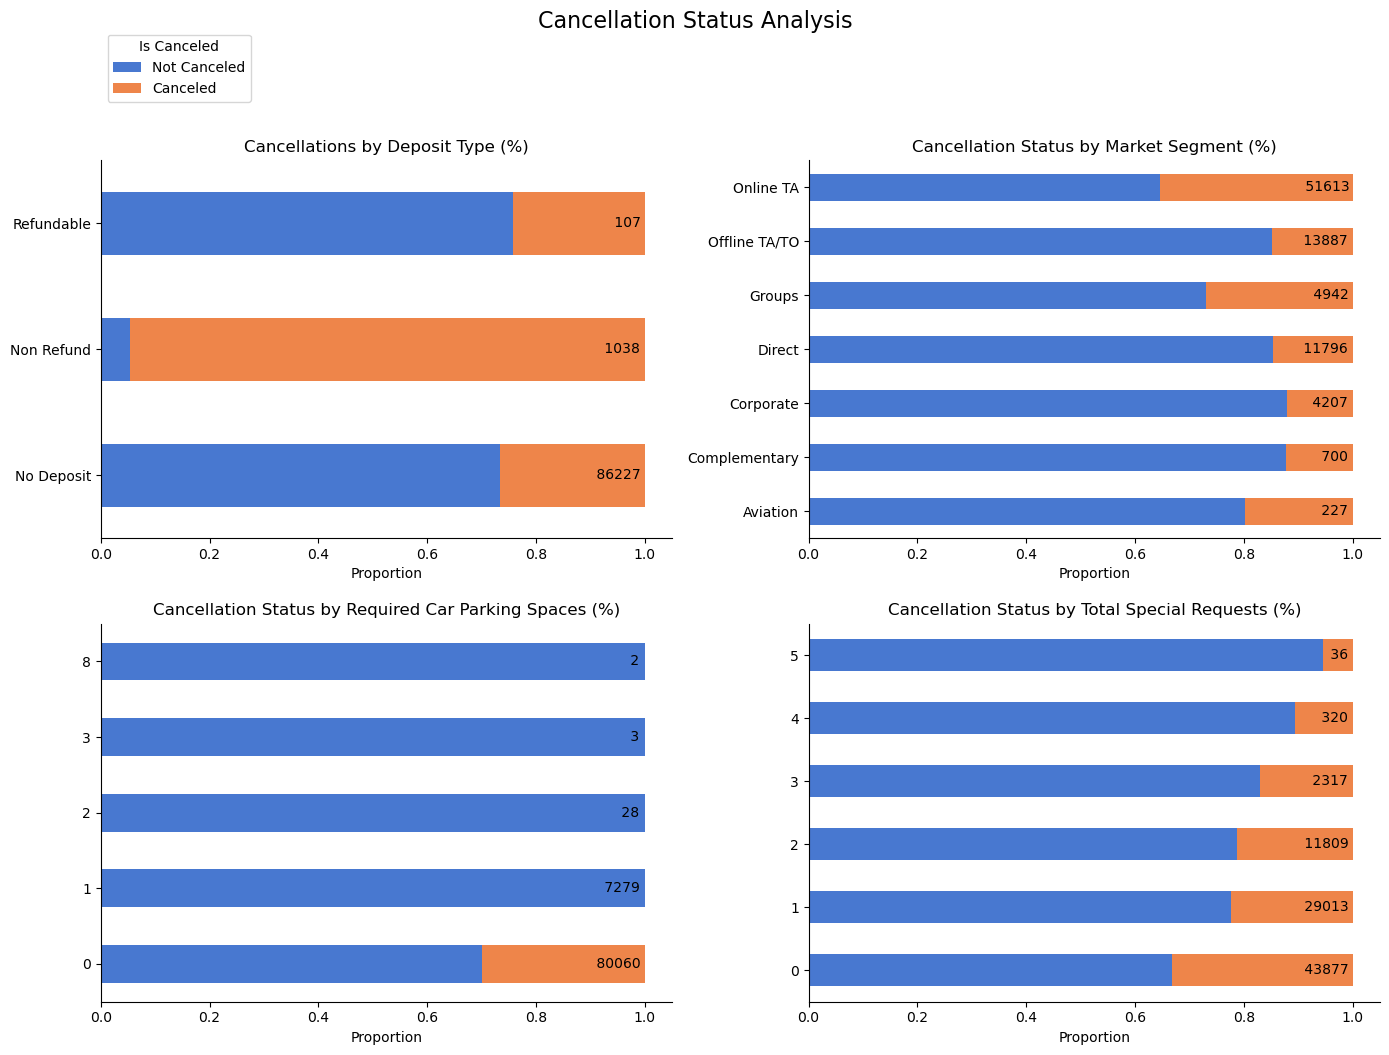

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample DataFrame
# df = pd.read_csv('your_dataset.csv')  # Assuming df is your DataFrame

# Define the palettes
palettes = ["muted", "muted", "muted", "muted"]

# Define the plot titles
plot_titles = [
    'Cancellations by Deposit Type (%)',
    'Cancellation Status by Market Segment (%)',
    'Cancellation Status by Required Car Parking Spaces (%)',
    'Cancellation Status by Total Special Requests (%)'
]

# Define the columns for each plot
columns = [
    ['deposit_type', 'is_canceled'],
    ['market_segment', 'is_canceled'],
    ['required_car_parking_spaces', 'is_canceled'],
    ['total_of_special_requests', 'is_canceled']
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Cancellation Status Analysis', fontsize=16, y=1.05)  # Add a big title

for ax, palette, title, column in zip(axes.flatten(), palettes, plot_titles, columns):
    # Group the data and calculate proportions
    grouped_data = df.groupby(column).size().unstack(fill_value=0)
    totals = grouped_data.sum(axis=1)  # Total counts for each group
    proportions = grouped_data.div(totals, axis=0)  # Normalize to proportions
    
    # Plotting with normalized data
    sns.set_palette(palette)
    bars = proportions.plot(kind='barh', stacked=True, ax=ax)  # Use proportions for plotting
    
    # Annotation for total counts
    for i, (index, row) in enumerate(proportions.iterrows()):
        total = totals.loc[index]  # Get total count for the current group
        # Adjust x position by subtracting a small value to move text slightly to the left
        x_position = row.cumsum().values[-1] - (row.max() * 0.01)  # Adjust here as needed
        ax.text(x_position, i, f' {total}', va='center', ha='right')

    # Adjust plot aesthetics
    ax.set_title(title)
    ax.set_xlabel('Proportion')
    ax.set_ylabel('')
    
    # Add legend only to the first subplot
    if ax == axes.flatten()[0]:
        ax.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'], loc='upper left', bbox_to_anchor=(0, 1.35))
    else:
        # Remove legend from other subplots
        ax.get_legend().remove()
    
    sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top margin to make room for the big title
plt.show()

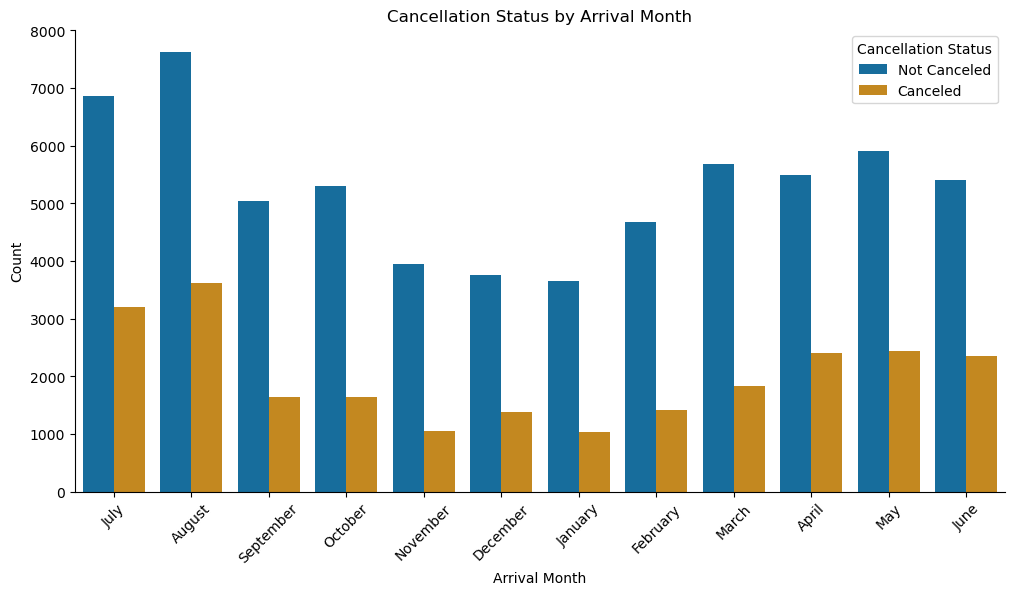

In [129]:
# Plotting
sns.set_palette('colorblind')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', order=df['arrival_date_month'].unique())
plt.title('Cancellation Status by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
sns.despine()

In [203]:
from sklearn.feature_selection import RFECV
import pandas as pd

# Assuming preprocessor is defined elsewhere and includes all preprocessing steps

# Instantiate the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Assuming X_train, y_train, X_test, y_test are already defined

# Apply preprocessing pipeline to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert preprocessed data back to DataFrame to keep column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

# Use RFECV for feature selection with logistic regression as the estimator
selector = RFECV(estimator=log_reg_model, step=1, cv=5, scoring='accuracy')
selector = selector.fit(X_train_preprocessed_df, y_train)

# Mask to filter selected features
mask = selector.support_

# Get the selected features from the mask
selected_features = X_train_preprocessed_df.columns[mask]

# Create DataFrames with selected features only
X_train_selected_df = X_train_preprocessed_df[selected_features]
X_test_selected_df = X_test_preprocessed_df[selected_features]

# Fit the logistic regression model on the selected features
log_reg_model.fit(X_train_selected_df, y_train)

# Predict and evaluate
y_pred = log_reg_model.predict(X_test_selected_df)
accuracy = accuracy_score(y_test, y_pred)
#class_report = classification_report(y_test, y_pred)

print(f"Selected Features: {selected_features.tolist()}")

ValueError: Shape of passed values is (95121, 1), indices imply (95121, 991)

In [202]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [201]:
selector.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [196]:
# Get list of tuples with ranking and feature names
ranked_features = sorted(zip(selector.ranking_, selected_features))

# print("Feature ranking:")
# for rank, name in ranked_features:
#     print(f"Rank {rank}: {name}")

print("\nTop 5 features:")
for rank, name in ranked_features[:5]:
    print(f"Rank {rank}: {name}")

print("\nSelected features (Rank 1):")
for selected, name in zip(selector.support_, selected_features):
    if selected:
        print(name)


Top 5 features:
Rank 1: pipeline-1__adr
Rank 1: pipeline-1__adults
Rank 1: pipeline-1__arrival_date_year
Rank 1: pipeline-1__booking_changes
Rank 1: pipeline-1__children

Selected features (Rank 1):
pipeline-1__lead_time
pipeline-1__arrival_date_year
pipeline-1__stays_in_week_nights
pipeline-1__adults
pipeline-1__children
pipeline-1__country
pipeline-1__previous_cancellations
pipeline-1__previous_bookings_not_canceled
pipeline-1__booking_changes
pipeline-1__adr
pipeline-1__required_car_parking_spaces
pipeline-2__agent
pipeline-3__hotel_Resort Hotel
pipeline-3__arrival_date_month_August
pipeline-3__arrival_date_month_December
pipeline-3__arrival_date_month_January
pipeline-3__arrival_date_month_July
pipeline-3__arrival_date_month_June
pipeline-3__arrival_date_month_May
pipeline-3__arrival_date_month_November
pipeline-3__arrival_date_month_October
pipeline-3__arrival_date_month_September
pipeline-3__meal_FB
pipeline-3__meal_HB
pipeline-3__meal_SC
pipeline-3__meal_Undefined
pipeline-3__m

In [194]:
selector.ranking_

array([1, 1, 6, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1])

In [207]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
# Removed for low p-values
'arrival_date_day_of_month', 'babies'


In [ ]:
Accuracy on test data: 0.8858188241231391

Classification Report on test data: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14948
           1       0.88      0.80      0.84      8830

    accuracy                           0.89     23778
   macro avg       0.89      0.87      0.87     23778
weighted avg       0.89      0.89      0.88     23778

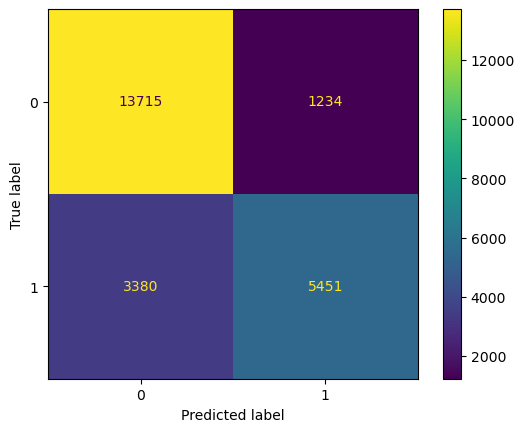

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_logreg, X_test, y_test)
plt.show()


In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings about unknown categories
warnings.filterwarnings(action='ignore', message='Found unknown categories')

# Load dataset
df = pd.read_csv('hotel_bookings.csv')

# Drop specified columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

# Define features and target variable
X = df.drop(columns=['is_canceled'])  # Exclude target variable
y = df['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define transformers for numerical and categorical features
num_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', drop='first'))

# Define column selectors for numerical and categorical features
num_features = make_column_selector(dtype_include='number')
cat_features = make_column_selector(dtype_include=object)

# Make the column transformer
preprocessor = make_column_transformer(
    (num_transformer, num_features),
    (cat_transformer, cat_features),
)

# Instantiate the random forest classifier model
rf_model = RandomForestClassifier()

# Create the pipeline
pipe = make_pipeline(preprocessor, rf_model)

# Fit the model
pipe.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy on train data: {pipe.score(X_train, y_train)}")
print(f"Accuracy on test data: {accuracy}")
print(f"\nClassification Report on test data: \n{class_report}")


Accuracy on train data: 0.9963355389898652
Accuracy on test data: 0.8939190887008962

Classification Report on test data: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     15033
           1       0.89      0.81      0.85      8845

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



In [43]:
pd.options.display.max_columns = 100
X_train_sm

,const,pipeline-1__lead_time,pipeline-1__arrival_date_year,pipeline-1__arrival_date_week_number,pipeline-1__arrival_date_day_of_month,pipeline-1__stays_in_weekend_nights,pipeline-1__stays_in_week_nights,pipeline-1__adults,pipeline-1__children,pipeline-1__babies,pipeline-1__is_repeated_guest,pipeline-1__previous_cancellations,pipeline-1__previous_bookings_not_canceled,pipeline-1__booking_changes,pipeline-1__days_in_waiting_list,pipeline-1__adr,pipeline-1__required_car_parking_spaces,pipeline-1__total_of_special_requests,pipeline-2__agent,pipeline-3__hotel_City Hotel,pipeline-3__hotel_Resort Hotel,pipeline-3__arrival_date_month_April,pipeline-3__arrival_date_month_August,pipeline-3__arrival_date_month_December,pipeline-3__arrival_date_month_February,pipeline-3__arrival_date_month_January,pipeline-3__arrival_date_month_July,pipeline-3__arrival_date_month_June,pipeline-3__arrival_date_month_March,pipeline-3__arrival_date_month_May,pipeline-3__arrival_date_month_November,pipeline-3__arrival_date_month_October,pipeline-3__arrival_date_month_September,pipeline-3__meal_BB,pipeline-3__meal_FB,pipeline-3__meal_HB,pipeline-3__meal_SC,pipeline-3__meal_Undefined,pipeline-3__country_ABW,pipeline-3__country_AGO,pipeline-3__country_AIA,pipeline-3__country_ALB,pipeline-3__country_AND,pipeline-3__country_ARE,pipeline-3__country_ARG,pipeline-3__country_ARM,pipeline-3__country_ASM,pipeline-3__country_ATA,pipeline-3__country_ATF,pipeline-3__country_AUS,...,pipeline-3__country_USA,pipeline-3__country_UZB,pipeline-3__country_VEN,pipeline-3__country_VGB,pipeline-3__country_VNM,pipeline-3__country_ZAF,pipeline-3__country_ZMB,pipeline-3__country_ZWE,pipeline-3__market_segment_Aviation,pipeline-3__market_segment_Complementary,pipeline-3__market_segment_Corporate,pipeline-3__market_segment_Direct,pipeline-3__market_segment_Groups,pipeline-3__market_segment_Offline TA/TO,pipeline-3__market_segment_Online TA,pipeline-3__market_segment_Undefined,pipeline-3__distribution_channel_Corporate,pipeline-3__distribution_channel_Direct,pipeline-3__distribution_channel_GDS,pipeline-3__distribution_channel_TA/TO,pipeline-3__distribution_channel_Undefined,pipeline-3__reserved_room_type_A,pipeline-3__reserved_room_type_B,pipeline-3__reserved_room_type_C,pipeline-3__reserved_room_type_D,pipeline-3__reserved_room_type_E,pipeline-3__reserved_room_type_F,pipeline-3__reserved_room_type_G,pipeline-3__reserved_room_type_H,pipeline-3__reserved_room_type_L,pipeline-3__reserved_room_type_P,pipeline-3__assigned_room_type_A,pipeline-3__assigned_room_type_B,pipeline-3__assigned_room_type_C,pipeline-3__assigned_room_type_D,pipeline-3__assigned_room_type_E,pipeline-3__assigned_room_type_F,pipeline-3__assigned_room_type_G,pipeline-3__assigned_room_type_H,pipeline-3__assigned_room_type_I,pipeline-3__assigned_room_type_K,pipeline-3__assigned_room_type_L,pipeline-3__assigned_room_type_P,pipeline-3__deposit_type_No Deposit,pipeline-3__deposit_type_Non Refund,pipeline-3__deposit_type_Refundable,pipeline-3__customer_type_Contract,pipeline-3__customer_type_Group,pipeline-3__customer_type_Transient,pipeline-3__customer_type_Transient-Party
0,1.0,-0.784882,1.193298,-1.552382,-1.000803,-0.928908,-0.261137,-1.464604,-0.259968,-0.078866,-0.180512,-0.104002,-0.091345,-0.335916,-0.132847,-0.074093,-0.253754,-0.720366,1.123813,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.897168,-0.221372,-1.185007,-0.773337,-0.928908,0.262232,0.246367,-0.259968,-0.078866,-0.180512,-0.104002,-0.091345,-0.335916,-0.132847,-0.034887,-0.253754,-0.720366,-0.699508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('hotel_bookings.csv')

# Add a constant column for the intercept
df['intercept'] = 1

# Proceed with your preprocessing steps, excluding the target variable and columns to be dropped
df = df.drop(['company', 'reservation_status', 'reservation_status_date'], axis=1)

# Define features and target variable
X = df.drop(columns=['is_canceled'])  # Exclude target variable
y = df['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform the training and testing data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# # Convert the transformed features into DataFrames
# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
# X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns=preprocessor.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=preprocessor.get_feature_names_out())


# # Add a constant term for the intercept for statsmodels
X_train_sm = sm.add_constant(X_train_transformed_df)
X_test_sm = sm.add_constant(X_test_transformed_df)

# BONUS CHALLENGE 1!

- Try out building your own scoring function that you pass to the scoring parameter in the GridSearchCV object!

*Check out scikit-learns `make_scorer()` method*

# BONUS CHALLENGE 2!

- Instead of a LogReg model, use a RandomForestClassifier model!

Which model had the best performance? Was there a big difference?
